# 이상치 데이터 처리
-피처/특성에 데이터 값의 범위를 벗어나는 데이터를 의미
- 종류 : 잘못 입력된 경우, 자연으로 생성된 데이터
    * 잘못입력된 데이터 : 입력 시 오타 ==> 제거 또는 대체
    * 자연 생성 데이터 : 연봉, 키, 몸무게, 나이 ==> 분리해서 전용 모델/식별용 피쳐 
- 탐지
    * 시각화 확인
    * 데이터의 분포를 확인 : Z-score/ IQR(Turkey Fences) 
- 처리
    * 제거 : 데이터 전처리 시 제거
    * 대체 : 데이터 전처리 시 대체

In [14]:
import pandas as pd
import matplotlib.pyplot as plt

dataDF=pd.DataFrame({'num':[1,4,3,2,4,5,-14,2,1,15]})

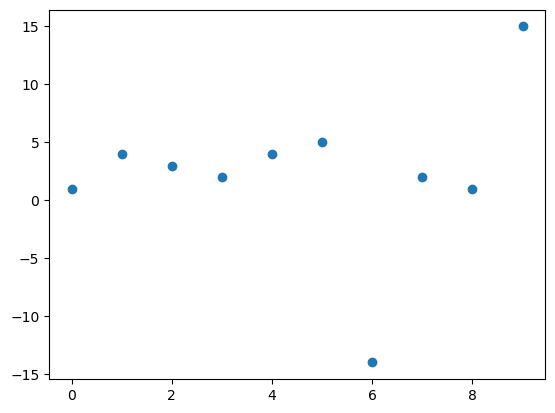

In [15]:
plt.scatter(range(dataDF.shape[0]),dataDF)

(array([1., 0., 0., 0., 0., 5., 3., 0., 0., 1.]),
 array([-14. , -11.1,  -8.2,  -5.3,  -2.4,   0.5,   3.4,   6.3,   9.2,
         12.1,  15. ]),
 <BarContainer object of 10 artists>)

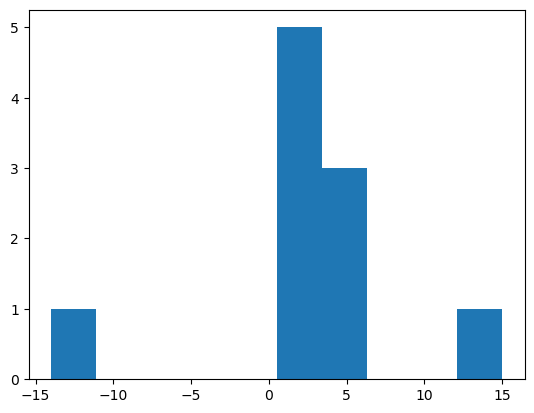

In [16]:
plt.hist(dataDF)

In [17]:
#결측치, 이상치 탐지 
# Z-Score : (데이터-평균)/표준편차

mean=dataDF.mean()
std=dataDF.std()
z_data=(dataDF-mean)/std

In [21]:
# 양끝단 제거를 위한 기준값 => 1.0
base=1.0
mask = z_data.abs() > base

In [22]:
dataDF[~mask ]

,num
0,1.0
1,4.0
2,3.0
3,2.0
4,4.0
5,5.0
6,NaN
7,2.0
8,1.0
9,NaN


In [24]:
# 이상치 탐지 - 방법(2) 데이터를 4등분해서
dataDF.quantile() # 매개변수로 0.0~1.0사이의 값을 넣을 수 있으며, 기본값은 0.5(=50%)이다 

num    2.5
Name: 0.5, dtype: float64

In [28]:
q1=dataDF.quantile(0.25)
q3=dataDF.quantile(0.75)
IQR=q3-q1
lower=q1-1.5*IQR
upper=q3+1.5*IQR

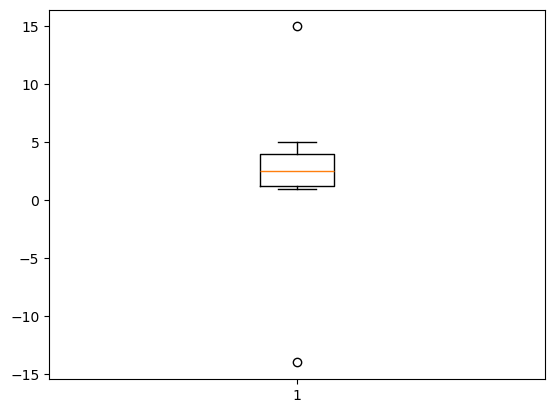

In [34]:
obj=plt.boxplot(dataDF)
plt.show()

In [33]:
dataDF[(dataDF<lower)]

,num
0,NaN
1,NaN
2,NaN
3,NaN
4,NaN
5,NaN
6,-14.0
7,NaN
8,NaN
9,NaN


In [38]:
# https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.quantile.html
# https://matplotlib.org/stable/api/_as_gen/matplotlib.axes.Axes.boxplot.html#matplotlib.axes.Axes.boxplot => filter에 데이터가 있다 
# https://matplotlib.org/stable/api/_as_gen/matplotlib.lines.Line2D.html

obj["fliers"]

In [42]:
obj["whiskers"][0].get_ydata(),obj["whiskers"][1].get_ydata(), q1,q3 # q1,q3구하는 법 

(array([1.25, 1.  ]),
 array([4., 5.]),
 num    1.25
 Name: 0.25, dtype: float64,
 num    4.0
 Name: 0.75, dtype: float64)

In [48]:
obj["medians"][0].get_data(), dataDF.median() # 중앙값 구하는 법 

((array([0.925, 1.075]), array([2.5, 2.5])),
 num    2.5
 dtype: float64)

In [53]:
dataDF

,num
0,1
1,4
2,3
3,2
4,4
5,5
6,-14
7,2
8,1
9,15


In [66]:
dataDF.describe()

,num
count,10.00000
mean,2.30000
std,7.02456
min,-14.00000
25%,1.25000
50%,2.50000
75%,4.00000
max,15.00000


In [67]:
# 이상치일때의 z score는 2.698이다
# 함수 생성
def statistics(df):
    print(f"데이터 정보 : {df.info()}")
    '''
    print("=========기본통계량=========")
    print(f"평균 : {df.mean()}")
    print(f"표준편차 : {df.std()}")
    print(f"고윳값 : {df.unique()}")
    print("=========이상치탐지=========")
    '''
    q1=df.quantile(0.25)
    q3=df.quantile(0.75)
    IQR=q3-q1
    lower=q1-1.5*IQR
    upper=q3+1.5*IQR
    '''
    print(f"Q1(25%) : {q1}")
    print(f"Q2, 중앙값(50%) : {df.quantile(0.50)}")
    print(f"Q3(75%) : {q3}")
    print(f"하한값 : {lower}")
    print(f"상한값 : {upper}")
    '''
    low_data=df[df<=lower]
    up_data=df[df>=upper]
    return low_data, up_data
a,b = statistics(dataDF.num)
print("\n\n\n하한값 : ", a, "\n상한값 : " , b)
    

<class 'pandas.core.series.Series'>
RangeIndex: 10 entries, 0 to 9
Series name: num
Non-Null Count  Dtype
--------------  -----
10 non-null     int64
dtypes: int64(1)
memory usage: 208.0 bytes
데이터 정보 : None



하한값 :  6   -14
Name: num, dtype: int64 
상한값 :  9    15
Name: num, dtype: int64
